In [1]:
import freenect
import cv2
import numpy as np
import pygame
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
def imshow(img, title = ''):
    # hide the x and y axis for images
    plt.axis('off')
    # RGB images are actually BGR in OpenCV, so convert before displaying
    if len(img.shape) == 3: 
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # otherwise, assume it's grayscale and just display it
    else:
        plt.imshow(img,cmap='gray')
    # add a title if specified
    plt.title(title)
    plt.show()

In [11]:
def compute_binary(current,background):
    diff = cv2.absdiff(current,background)
    threshold = np.zeros_like(diff)
#     for x in range(diff.shape[0]):
#         for y in range(diff.shape[1]):
#             if diff[x,y] > 70:
#                 threshold[x,y] = 255
#             elif diff[x,y] < 30:
#                 threshold[x,y] = 0
#             else:
#                 threshold[x,y] = 128
    
    return threshold
    

In [12]:
def compute_binary2(diff,threshold):
#     threshold[diff > 60] = 128
    condition = np.logical_and(diff < 70,diff > 50)
    condition = np.logical_and(condition,threshold == 0)
    threshold[condition] = 128
#     for x in range(diff.shape[0]):
#         for y in range(diff.shape[1]):
#             if diff[x,y] > 70:
#                 threshold[x,y] = 255
#             elif diff[x,y] < 30:
#                 threshold[x,y] = 0
#             else:
#                 threshold[x,y] = 128
    
    return threshold

In [14]:
camera = cv2.VideoCapture(0)
background = None
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 200
params.filterByCircularity = True
params.minCircularity = 0.5
params.filterByConvexity = False
params.minConvexity = 0.7
detector = cv2.SimpleBlobDetector_create(params)
while True:
    ret, frame_orig = camera.read()
    #convert to gray 
    frame_orig = cv2.cvtColor(frame_orig,cv2.COLOR_BGR2GRAY)
    cv2.imshow('camera', frame_orig)
    
    if not background is None:
        diff = cv2.absdiff(frame_orig,background)
        _,frame_threshold = cv2.threshold(diff,70,255,cv2.THRESH_BINARY)
        erosion = cv2.erode(frame_threshold,(3,3),iterations = 6)
        dilation = cv2.dilate(erosion,(3,3),iterations = 6)
#         x = compute_binary2(diff,dilation)
#         _, contours,tree = cv2.findContours(dilation, cv2.RETR_TREE,
#                                          cv2.CHAIN_APPROX_SIMPLE)
        im2 = frame_orig.copy()
        keypoints = detector.detect(dilation)
        print(len(keypoints))
        for k in keypoints:
            cv2.circle(im2, (int(k.pt[0]), int(k.pt[1])), int(k.size/2), (0, 0, 255), -1)
#         output = cv2.connectedComponentsWithStats(dilation, 4, cv2.CV_32S)
#         print(output[0])
#         for i in range(len(contours)):
#             x,y,w,h = cv2.boundingRect(contours[i])
#             if tree[0][i][2] < 0 and cv2.contourArea(contours[i]) > 2000:
#                  cv2.rectangle(im2,(x,y),(x+w,y+h),(0,255,0),2)
#             im2 = cv2.drawContours(im2, contours, -1, (0,255,255), 3)
        cv2.imshow('camera', im2)
    if cv2.waitKey(5) == 32:
        background = frame_orig
#         cv2.imwrite('temp_background.png',background)
    if cv2.waitKey(5) == ord('a'):
        cv2.imwrite('temp1.png',frame_orig)
    if cv2.waitKey(5) == 27:
        break

cv2.destroyAllWindows()
print('destroy')
camera.release()
print('release')
cv2.waitKey(1)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
2
2
2
1
1
1
0
1
0
0
0
0
0
0
1
2
2
1
1
2
2
2
2
1
2
1
1
2
2
2
2
2
0
1
0
0
0
1
1
1
1
1
0
0
0
0
1
0
0
destroy
release


-1

In [1]:
camera.release()

NameError: name 'camera' is not defined

In [206]:
temp = cv2.imread('temp.png')
# temp = cv2.resize(temp,None,fx=0.2, fy=0.2, interpolation = cv2.INTER_CUBIC)
temp1 = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)

In [193]:
# temp_background = cv2.cvtColor(cv2.imread('temp_background.png'),cv2.COLOR_BGR2GRAY)
temp1 = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
# threshold = compute_binary(temp1,temp_background)
output = cv2.connectedComponentsWithStats(temp1, 2, cv2.CV_32S)

In [194]:
from colorhash import ColorHash

In [195]:
for i in range(output[1].shape[0]):
    for j in range(output[1].shape[1]):
        c = ColorHash(output[1][i,j])
        temp[i,j] = list(c.rgb)

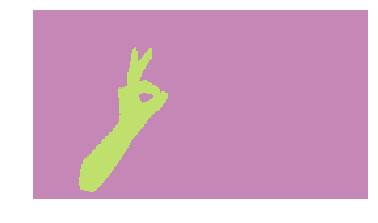

In [196]:
imshow(temp)

In [116]:
output[2][0][4]

34525

In [150]:
output[2]

array([[     0,    559,    117,    161,    338],
       [     0,      0,   1280,    720, 921262]], dtype=int32)

In [149]:
output[0]

2

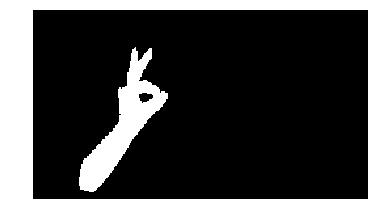

In [203]:
imshow(temp)

In [237]:
params = cv2.SimpleBlobDetector_Params()
params.filterByCircularity = True
params.minCircularity = 0.7
params.filterByConvexity = True
params.minConvexity = 0.7
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(temp1)
im_with_keypoints = cv2.drawKeypoints(temp1, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

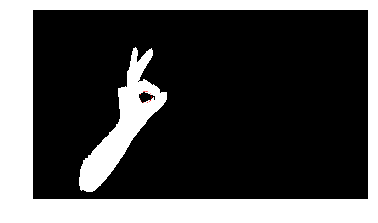

In [238]:
imshow(im_with_keypoints)

In [239]:
keypoints

[<KeyPoint 0x1a1a67dba0>]

In [245]:
for k in keypoints:
    cv2.circle(temp, (int(k.pt[0]), int(k.pt[1])), int(k.size/2), (0, 0, 255), -1)

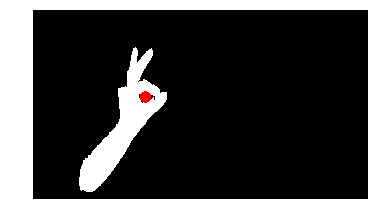

In [246]:
imshow(temp)

In [7]:
len(keypoints)

2